In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
k = 10          # Reservoir rock permeability in md
q = 100         # Oil flow rate in STB/D
B0 = 1.1        # Oil formation volume in bbl/STB
viscosity = 0.9 # Oil viscosity in cp
h = 40          # Reservoir Thickness (ft)
pe = 900        # Reservoir boundary pressure (psi)
re = 1200       # Reservoir radius (ft)
rw = 0.4        # Wellbore radius (ft)

In [10]:
r = np.random.uniform(rw,re,500)
r.sort()
df = pd.DataFrame({"r" : r})
df["p"] = pe - ((141.2*q*B0*viscosity*np.log(re/df["r"]))/(k*h))

In [29]:
def skin_effect(s,rs):
    plt.figure(figsize = (15,8))
    ks = (k*(np.log(rs/rw)))/(s + np.log(rs/rw))
    t = np.random.uniform(rw,rs,500)
    t.sort()
    rf = pd.DataFrame({"t" : t})
    rf["q"] = pe - (141.2*q*B0*viscosity*(((np.log(re/rs))/k)+(np.log(rs/rf["t"]))/ks))/h

    plt.plot(df["r"],df["p"], c = "b" , label= " No Skin")
    plt.plot(rf["t"],rf["q"], c = "r", label= " Damaged well")

    plt.xlabel("Distance from Wellbore")
    plt.ylabel("Reservoir Pressure")
    plt.title("Skin and Skin zone Effect on Pressure Drawdown")
    plt.style.use('default')
    plt.grid(True, color = 'g')

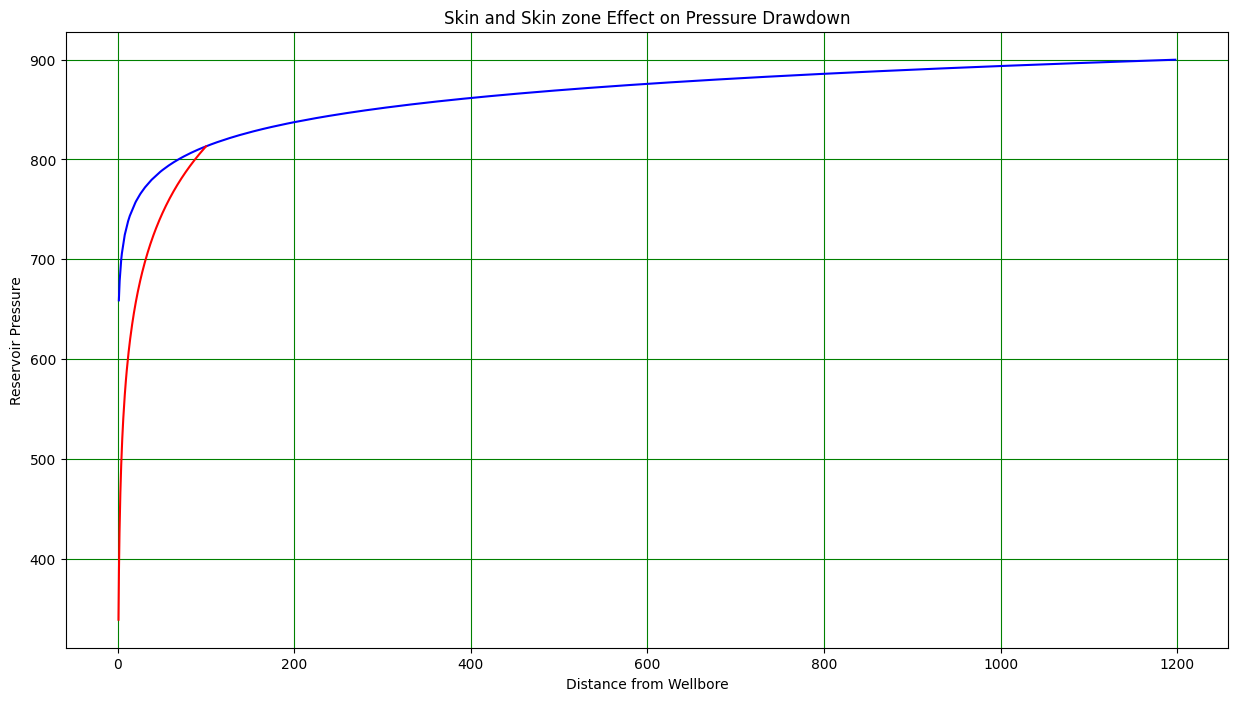

In [30]:
skin_effect(10,100)

In [31]:
from ipywidgets import interact,interactive

In [33]:
interactive(skin_effect , s =(-5,20,0.5), rs = (0.5,100,0.2))

interactive(children=(FloatSlider(value=7.0, description='s', max=20.0, min=-5.0, step=0.5), FloatSlider(value…